In [1]:
import sys
sys.path.append("../hyperbolic")
import hyperbolic as hype
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

%load_ext autoreload
%autoreload 2

To run an experiment, 
* we sample a realization of white Gaussian noise on the space of analytic signals, 
* we compute its analytic wavelet transform (AWT) using Paul's wavelet, 
* we find the zeros of the scalogram, 
* we plot the signal, its spectrum, and the scalogram.

The code in `examples/example1.py` mimics this exactly.

In [2]:
%run -i '../examples/example1.py'

Figures will be saved in the current folder; file names will contain the id "demo".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.
### Plotting the corresponding realization of white noise.
### Plotting the scalogram.
There are  224 zeros.


Now you should have the output as pdf and eps figures in the current folder. Alternately, if your browser allows it, you can view them from this notebook as follows.

In [3]:
from IPython.display import IFrame
IFrame("scalogram_demo_alpha=0.0.pdf", width=1000, height=400)

## Show the effect of a simple signal

In [4]:
npr.seed(1)
xp = hype.Experiment(alpha=0., expId="pytest")
xp.sampleWhiteNoise()

Figures will be saved in the current folder; file names will contain the id "pytest".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.


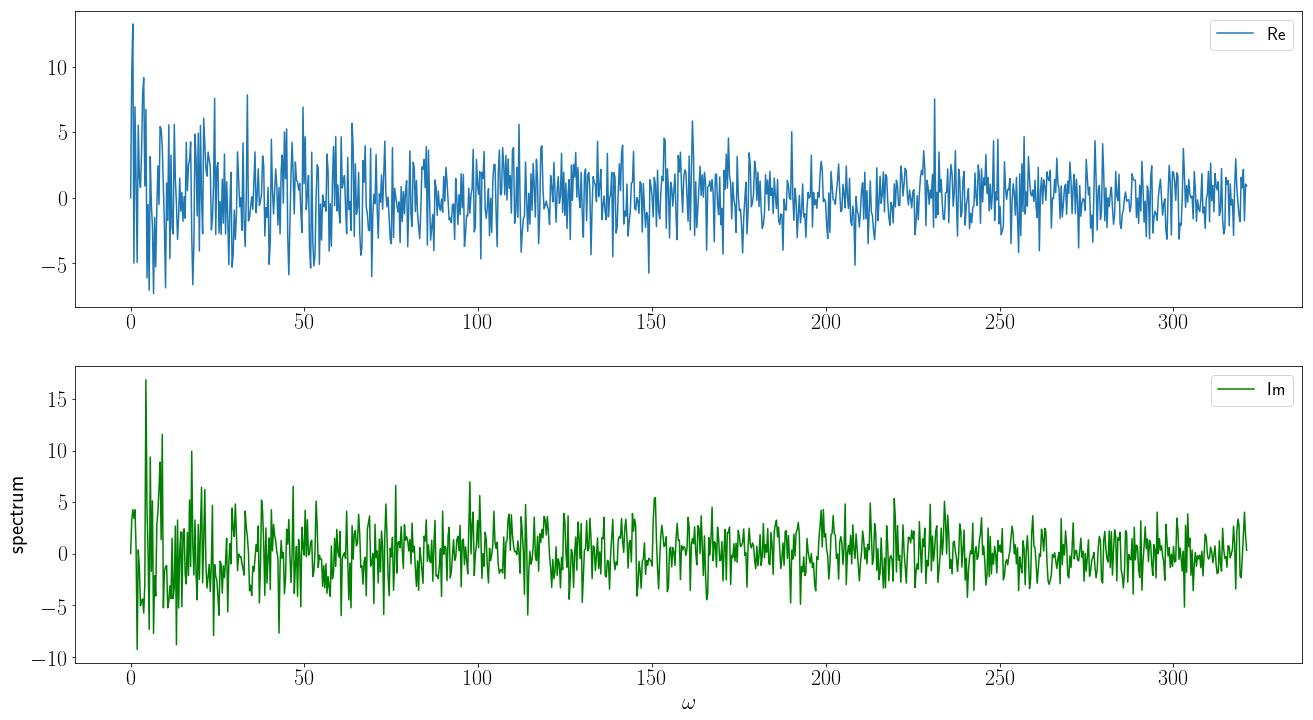

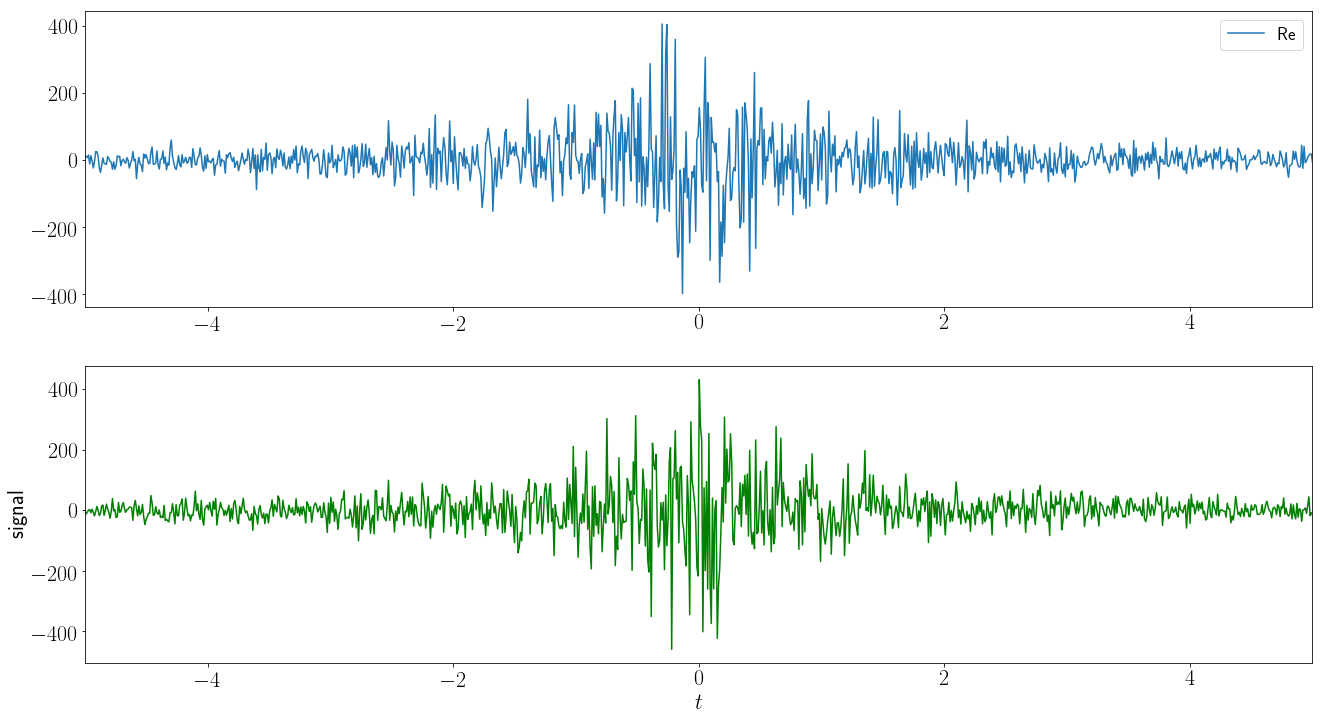

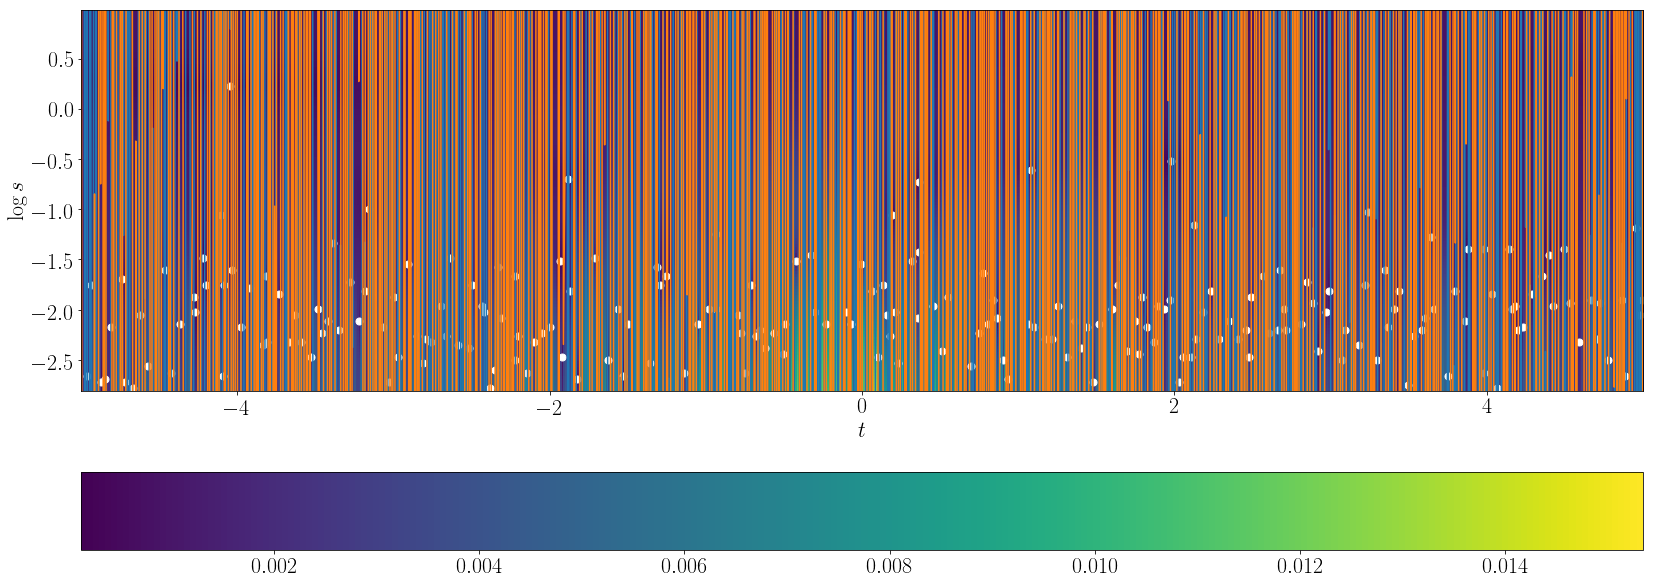

In [5]:
plt.plot(xp.tArray, np.real(xp.signal))
plt.plot(xp.tArray, np.imag(xp.signal))
plt.show()

Figures will be saved in the current folder; file names will contain the id "demo".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


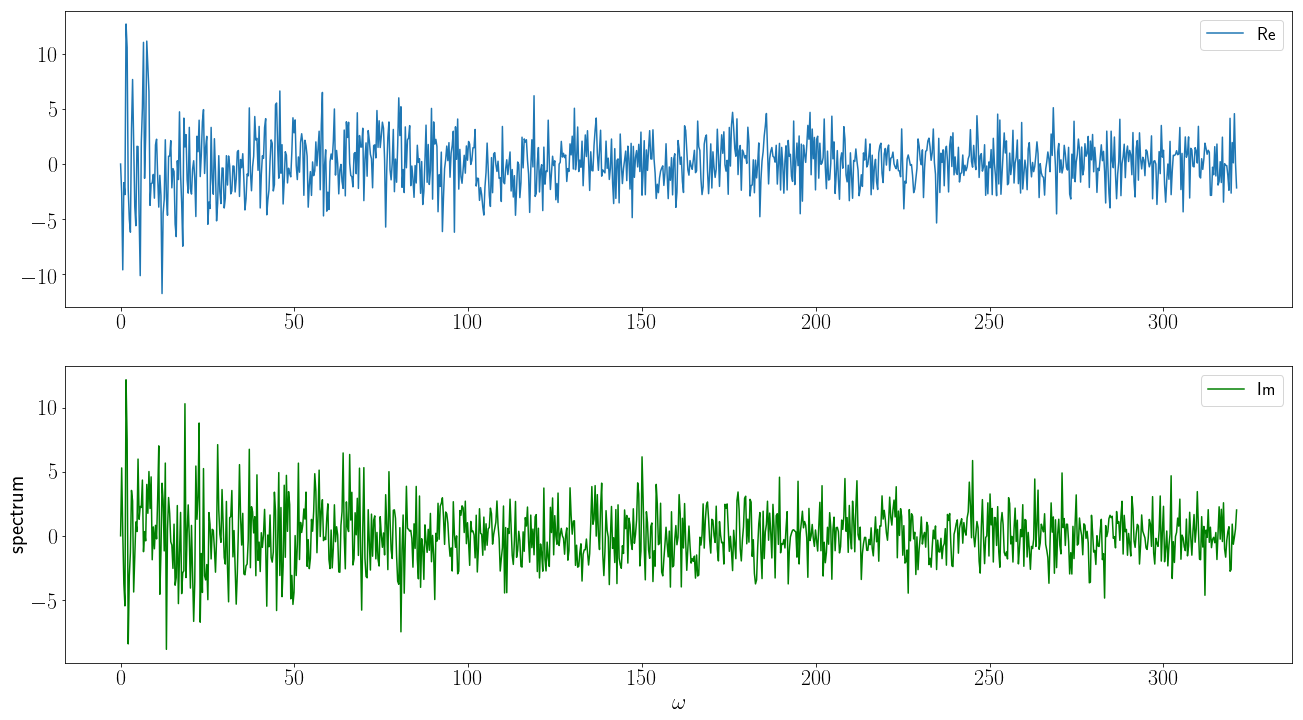

### Plotting the corresponding realization of white noise.
### Plotting the scalogram.
There are  197 zeros.


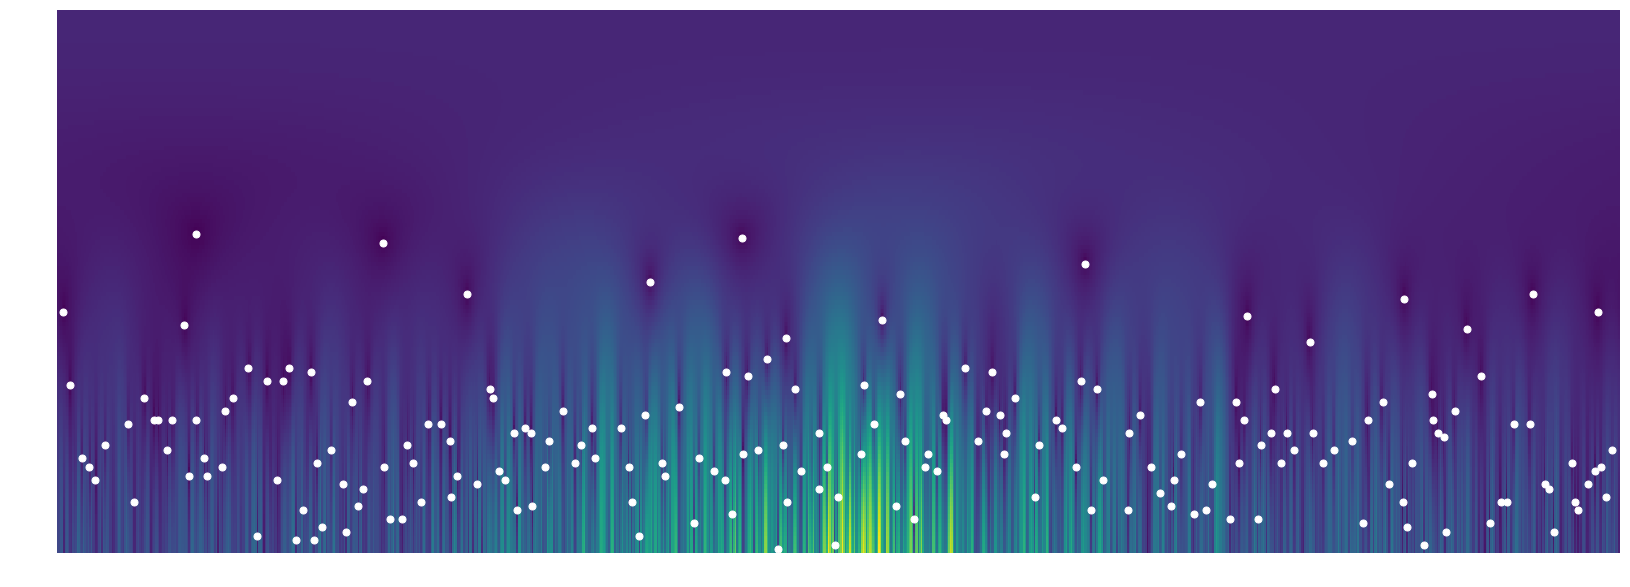

In [6]:
import laguerre
    
xp = hype.Experiment(alpha=0.0, expId="demo")
xp.sampleWhiteNoise()
xp.performAWT()
xp.findZeros()
xp.plotResults(boolShow=1, boolDemo=1)

### Plotting the spectrum of the realization of white noise.


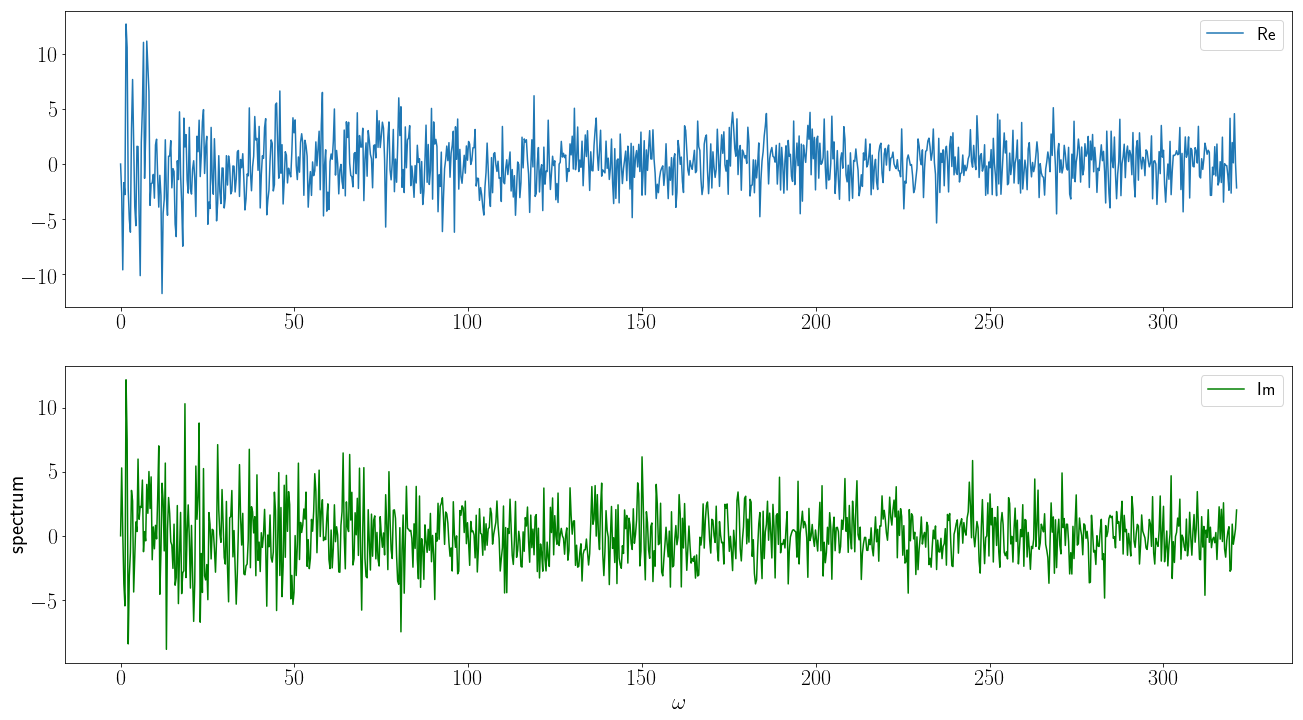

### Plotting the corresponding realization of white noise.
### Plotting the scalogram.
There are  197 zeros.


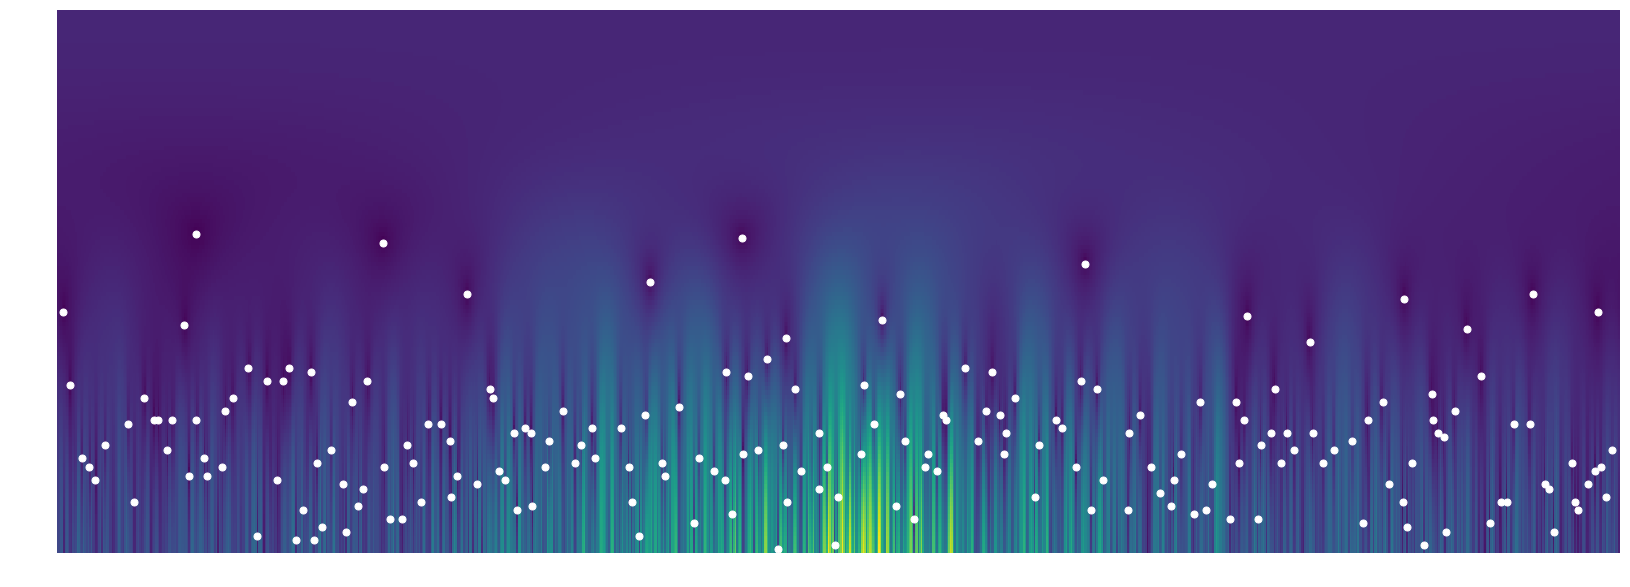

In [7]:
xp.plotResults(boolShow=1, boolDemo=1)

snr 100
Figures will be saved in the current folder; file names will contain the id "detection".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


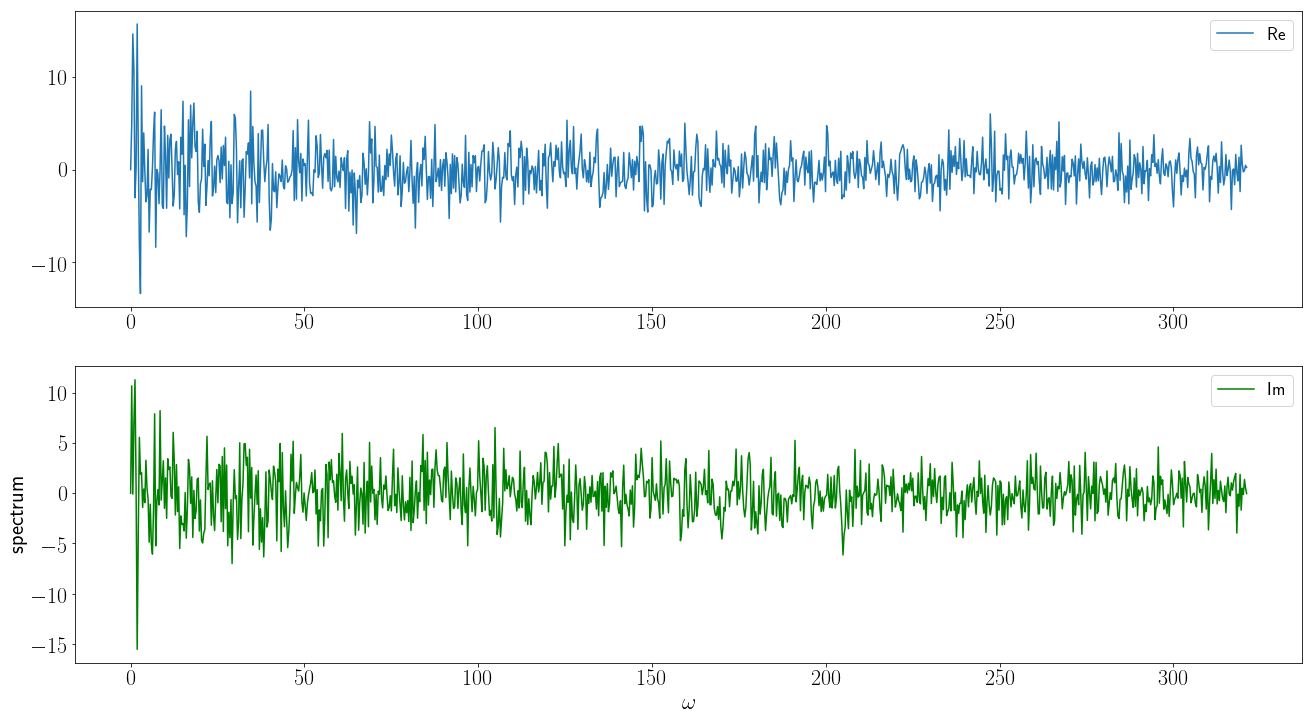

### Plotting the corresponding realization of white noise.
### Plotting the scalogram.
There are  200 zeros.


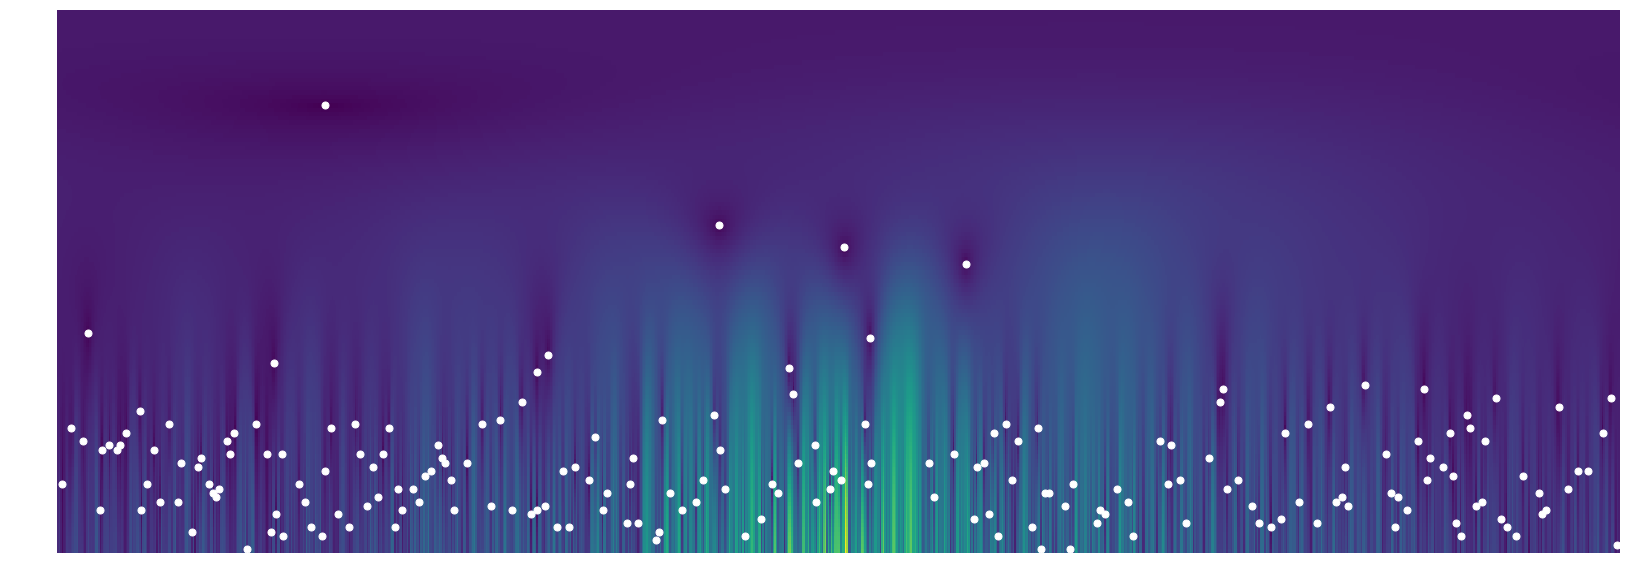

In [8]:
# import laguerre
    
#for i, snr in enumerate(np.linspace(0,1000,101)):
for i, snr in enumerate([100]):
    
    npr.seed(1)
    print("snr", snr)
    # xp = hype.Experiment(alpha=0.0, expId="frame"+str(i)+"_snr"+str(int(snr)))
    xp = hype.Experiment(alpha=0.0, expId="detection")
    xp.sampleWhiteNoise()
    a = np.zeros(xp.M) # coefficients of signal in the inverse Laguerre basis
    a[6] = snr
    noiselessSignal = np.zeros(xp.tArray.shape, dtype=np.complex)
    for i, s in enumerate(laguerre.IFLaguerreFunctions(xp.M,xp.alpha,xp.tArray)):
        xp.signal += a[i]*s
        noiselessSignal += a[i]*s
    xp.performAWT()
    xp.findZeros(th=.5)
    xp.plotResults(boolShow=1, boolDemo=1)
    plt.clf()

### Plotting the spectrum of the realization of white noise.


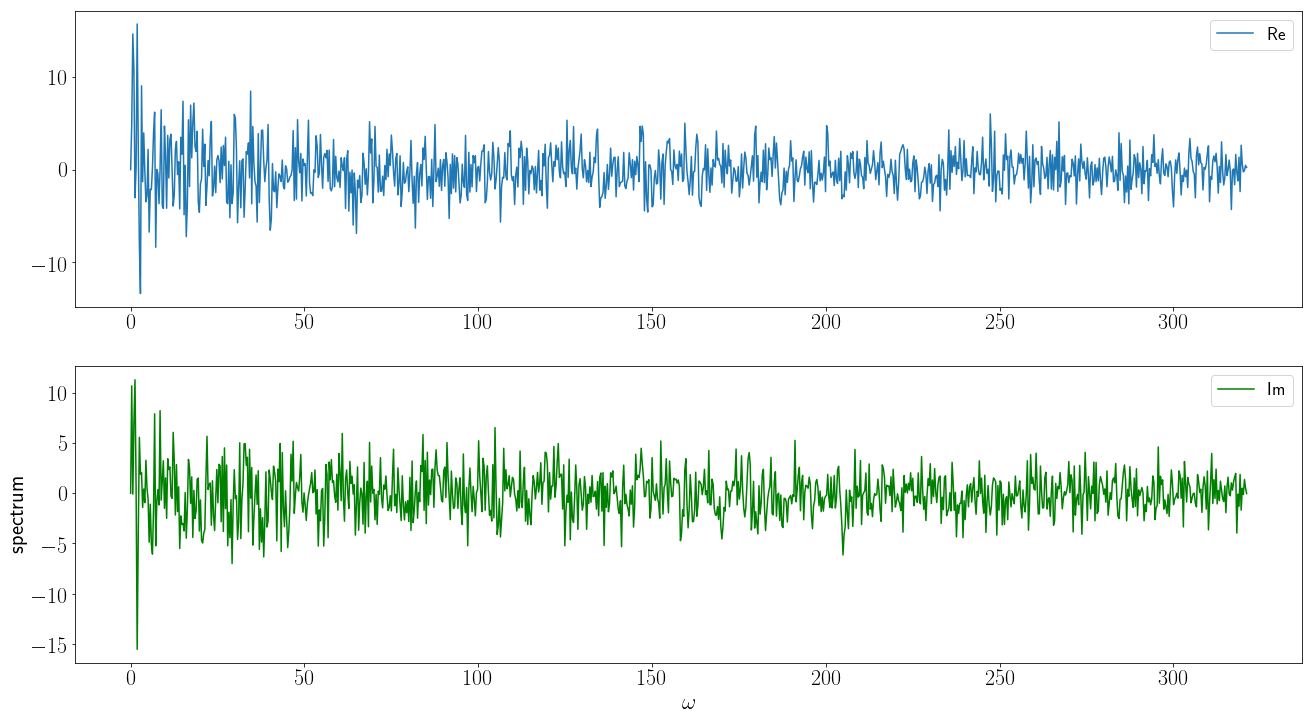

### Plotting the corresponding realization of white noise.


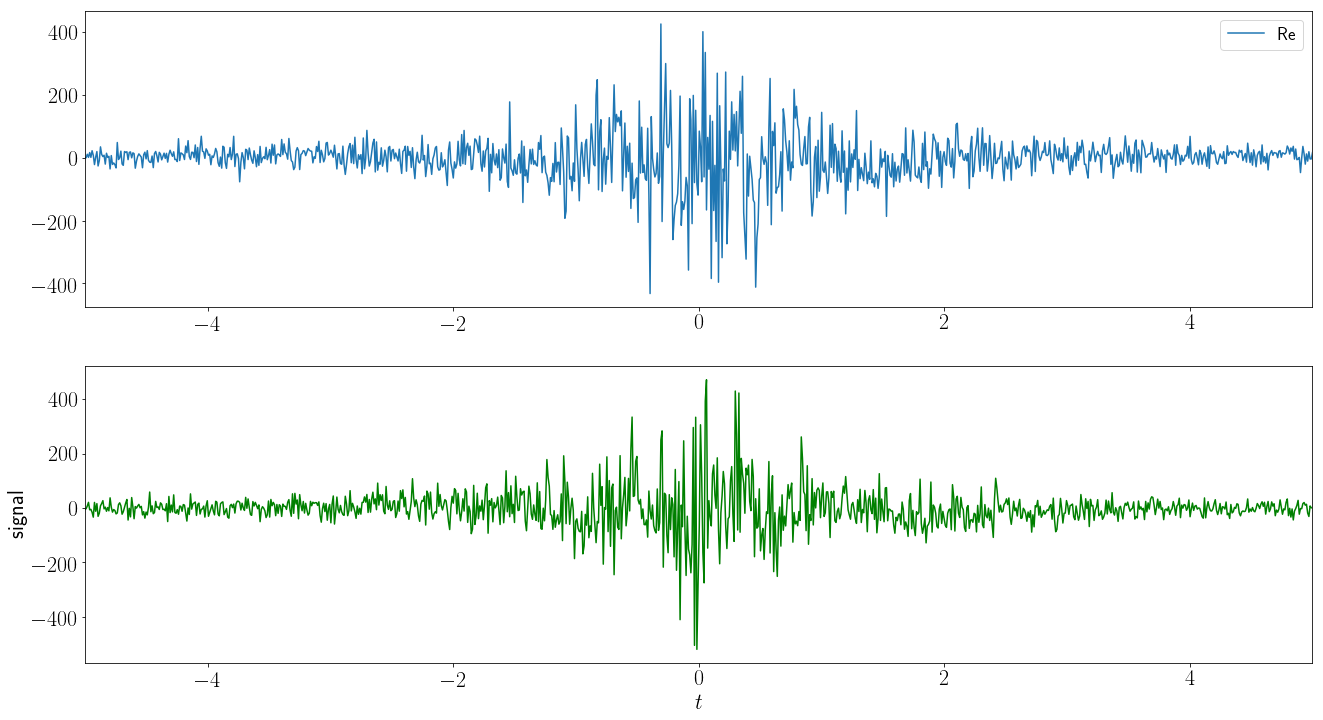

### Plotting the scalogram.
There are  200 zeros.


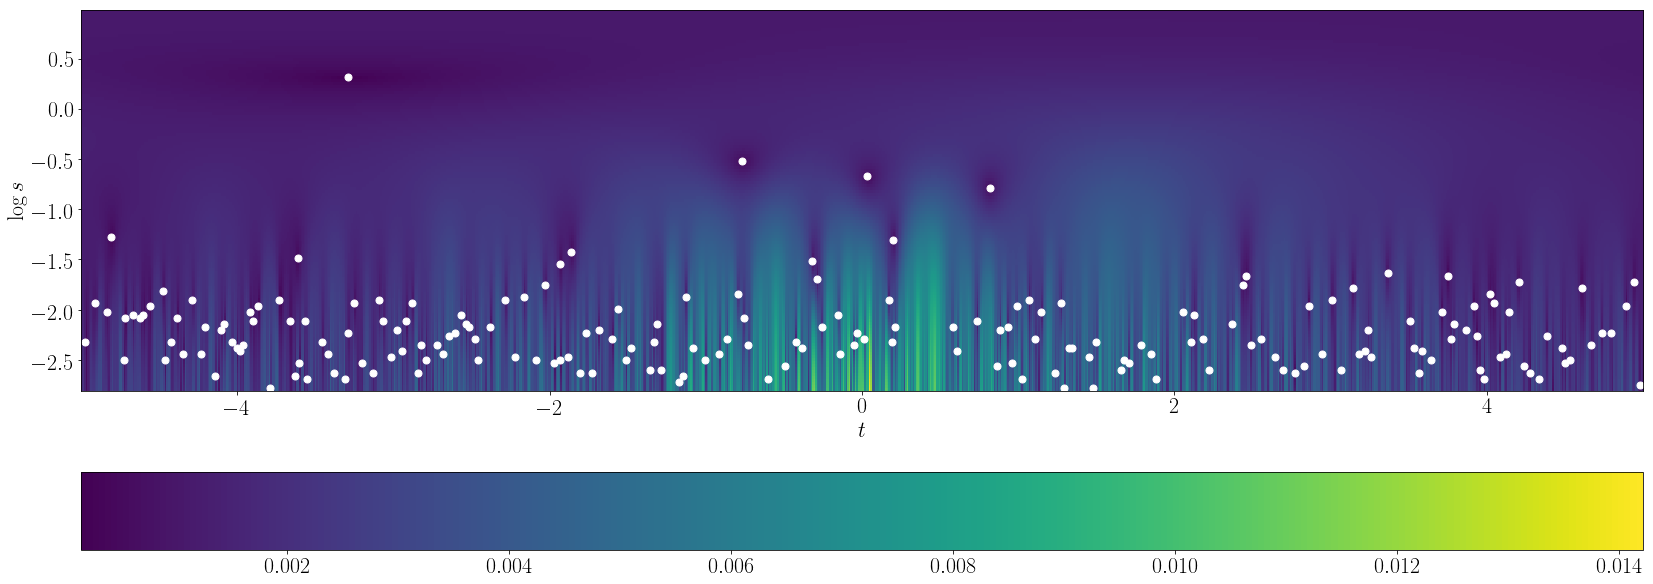

In [9]:
xp.performAWT()
xp.findZeros()
xp.plotResults(boolShow=1)

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


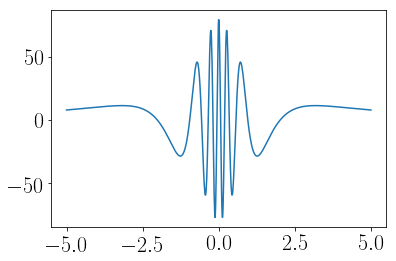

In [10]:
plt.plot(xp.tArray, noiselessSignal)
plt.show()

In [11]:
for i, s in enumerate(laguerre.IFLaguerreFunctions(xp.M,xp.alpha,xp.tArray)):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-11-8970a1c831f9>, line 2)

# More about the basis functions

In [ ]:
import matplotlib as mpl
# Set plotting options
mpl.rcParams['xtick.labelsize'] = 26;
mpl.rcParams['ytick.labelsize'] = 26;
plt.rc('axes', labelsize=26);
plt.rc('legend', fontsize=18);
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0));
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));
mpl.rcParams['ps.useafm'] = True;
mpl.rcParams['pdf.use14corefonts'] = True;
mpl.rcParams['text.usetex'] = True;
%pylab inline
figsize(10,6)

In [ ]:
import laguerre

# Plot them
values = np.linspace(-4,4,100)
index = 0
alpha = 2.0
for c in laguerre.IFLaguerreFunctions(6,alpha,values):
    plt.plot(values, c, label="k="+str(index))
    index += 1
plt.legend(loc=1)
plt.savefig("inverseLaguerreFunctions_alpha="+str(alpha)+".pdf")
plt.savefig("inverseLaguerreFunctions_alpha="+str(alpha)+".eps")
plt.show()

In [ ]:
#